# Import the Dependencies

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

# Data Collection And Processing

In [137]:
#loading the csv data to a Pandas DataFrame
data = pd.read_csv("F:\Data Science Assignment\heart data  set file\heart_disease_data.csv")

In [138]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [139]:
#Print first 5 rows in the data set.
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [140]:
#Print last 5 rows from the data set.
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [141]:
# number of rows and columns in the dataset
data.shape

(303, 14)

In [142]:
#Getting some information about the data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [143]:
# checking for missing values
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

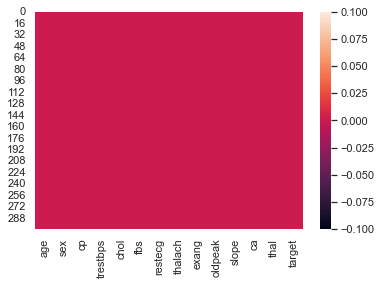

In [189]:
sns.heatmap(data.isnull())

In [144]:
## statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [145]:
# checking the distribution of Target Variable
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart
0 --> Healthy Heart

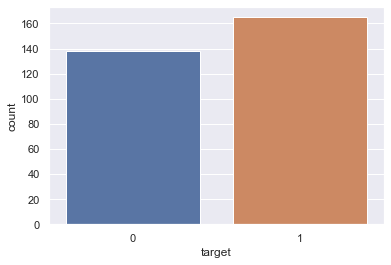

In [146]:
sns.countplot(x= data["target"]);

In [147]:
#Mininum, maximum & average age of the persons having heart disease

In [148]:
data.groupby(["target"])["age"].agg(["min", "max", "mean"])

,min,max,mean
target,,,
0,35,77,56.601449
1,29,76,52.496970


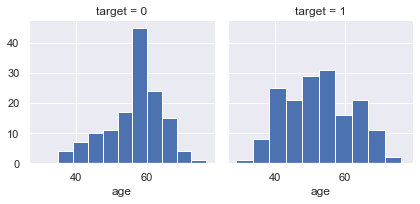

In [149]:
#how age is related with heart disease?
g=sns.FacetGrid(data = data[data["age"].notna()], col = "target")
g.map(plt.hist, "age");


Text(0.5, 0, 'age')

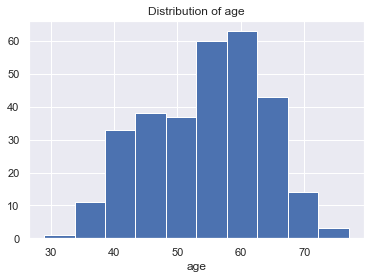

In [150]:
#Distribution of age 
plt.hist(data["age"])
plt.title("Distribution of age")
plt.xlabel("age")

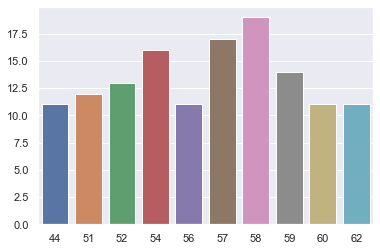

In [151]:
#Checking 10 ages and their values
sns.barplot(x= data["age"].value_counts()[:10].index, y = data["age"].value_counts()[:10].values);

In [152]:
round(data.groupby(["target"])["age"].agg(["min", "max", "mean"]), 2)

,min,max,mean
target,,,
0,35,77,56.6
1,29,76,52.5


In [153]:
#Ratio od Male and female
data["sex"] = data["sex"].map({0:"Female", 1:"Male"})
data["sex"].agg(["value_counts"])

,value_counts
Male,207
Female,96


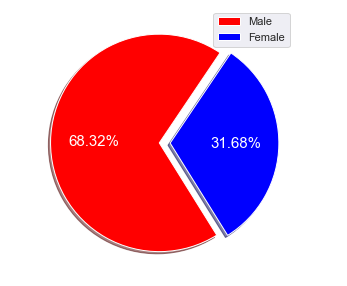

In [154]:
sex = data["sex"].unique()

values = data["sex"].value_counts()
color = ["#FF0000", "#0000FF"]

plt.figure(figsize=(5, 5))

plt.pie(values, labels=sex, colors=color, explode=(0, 0.1), autopct="%.2f%%", textprops={"fontsize":15, "color":"w"},shadow=True,  startangle=56)
plt.legend()


Ratio of male and female is approx 2:1


In [155]:
#Is sex is related to heart disease?
data.groupby(["sex"])["target"].agg(["value_counts"])

value_counts
sex    target              
Female 1                 72
       0                 24
Male   0                114
       1                 93

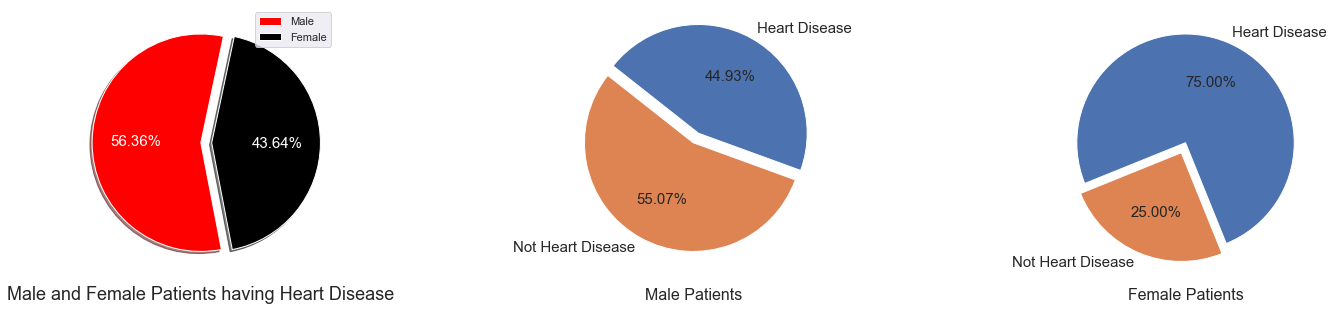

In [156]:
labels = ["Heart Disease", "Not Heart Disease"]

male = data[data["sex"]=="Male"]["target"].value_counts().sort_values(ascending=True)
female = data[data["sex"]=="Female"]["target"].value_counts()
paitients = data[data["target"]==1]["sex"].value_counts()
color = ["#FF0000", "#000000"]

plt.figure(figsize = (25, 5))

plt.subplot(1, 3, 1)
plt.pie(paitients, labels=sex, colors=color, explode=(0, 0.1), autopct="%.2f%%", textprops={"fontsize":15, "color":"w"}, shadow=True, startangle=78)
plt.title("Male and Female Patients having Heart Disease", y=-0.1, fontsize=18)
plt.legend()

plt.subplot(1, 3, 2)
plt.pie(male, labels=labels, explode=(0.1, 0), autopct="%.2f%%", textprops = {"fontsize":15}, startangle=-20)
plt.title("Male Patients", y=-0.1, fontsize=16)

plt.subplot(1, 3, 3)
plt.pie(female, labels=labels, explode=(0, 0.1), autopct="%.2f%%", textprops={"fontsize":15}, startangle=-68)
plt.title("Female Patients", y=-0.1, fontsize=16);

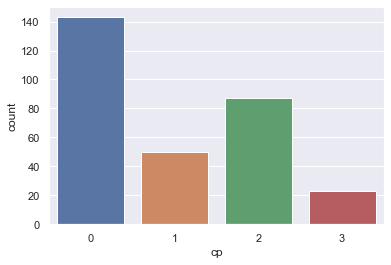

In [157]:
#What are the different types of chest pain?
data["cp"].agg(["value_counts"])
sns.countplot(x = data["cp"]);

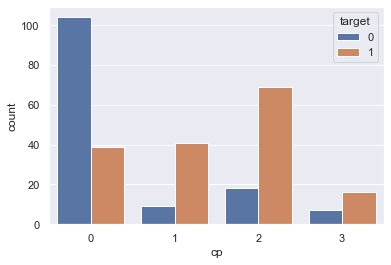

In [158]:
#How chest pain is related with heart disease?
data.groupby(data["cp"])["target"].agg(["value_counts"])
sns.countplot(x="cp", data=data, hue="target");

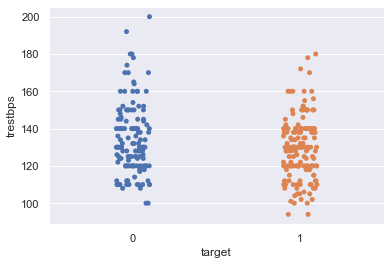

In [159]:
#How blood pressure is related with heart disease?
sns.stripplot(x="target", y="trestbps", data=data);

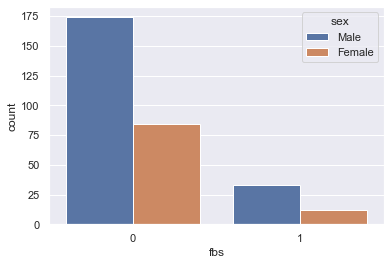

In [160]:
#Do Males and Females absorb glucose differently?
data.groupby(["fbs"])["sex"].agg(["value_counts"])
sns.countplot(x="fbs", data=data, hue="sex");

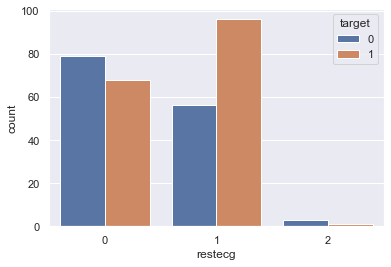

In [161]:
#Electrocardiographic relation with heart disease
data.groupby("restecg")["target"].agg(["count"])
sns.countplot(x="restecg", data=data, hue="target");

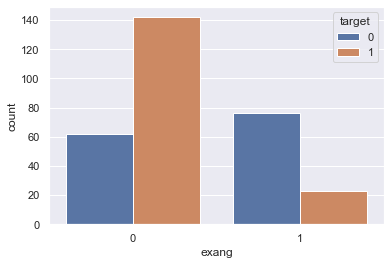

In [162]:
#How agina is related with heart disease?
data.groupby(["exang"])["target"].agg(["value_counts"])
sns.countplot(x="exang", data=data, hue="target");

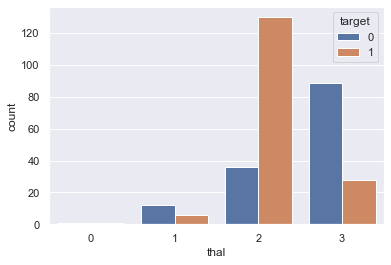

In [164]:
#How Thalassemia is related with heart disease?
data.groupby(["thal"])["target"].agg(["value_counts"])
sns.countplot(x="thal", data=data, hue="target");

In [165]:
data["sex"] = data["sex"].map({"Female":0,"Male":1})
data["sex"].agg(["value_counts"])

,value_counts
1,207
0,96


In [166]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Checking for normal distribution of data

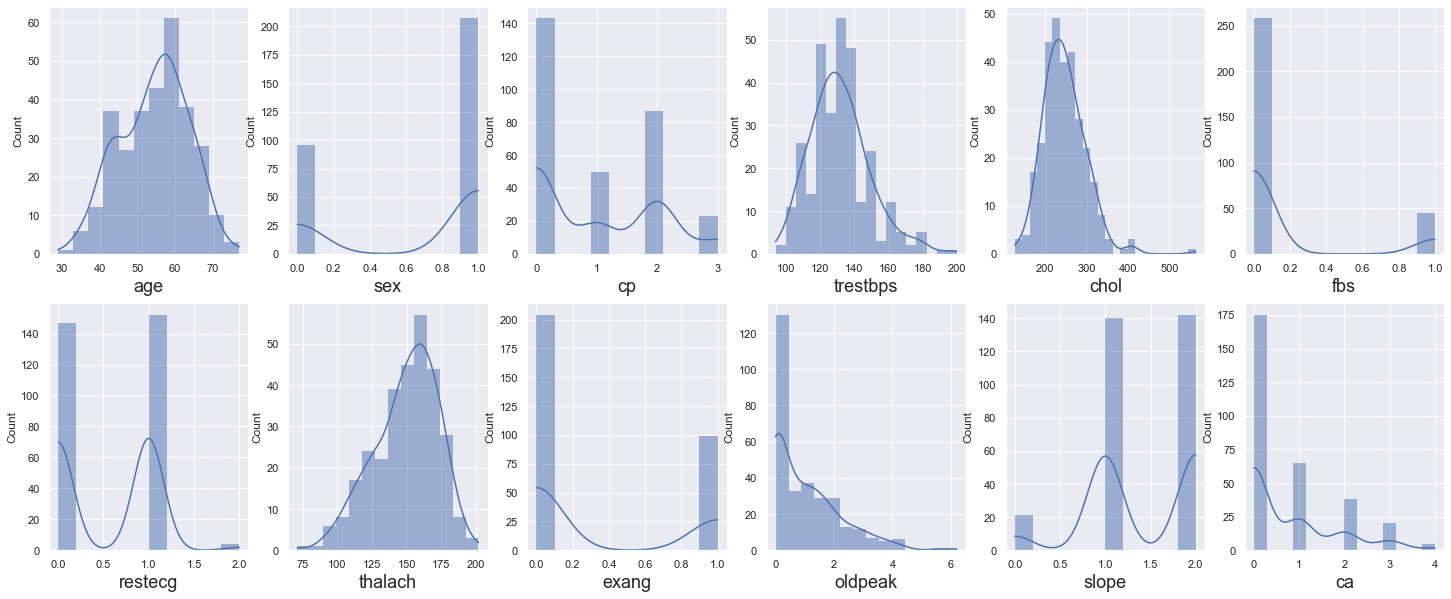

In [167]:
plt.figure(figsize=(25, 10))
col = 1

for i in data.columns:
    if data[i].dtype == "object":
        continue
    elif col<13:
        plt.subplot(2, 6, col)
        sns.histplot(data[i], kde=True, linewidth=0)
        plt.xlabel(i, y=-0.1, fontsize=18)
    col=col+1

# Detecting Outliers

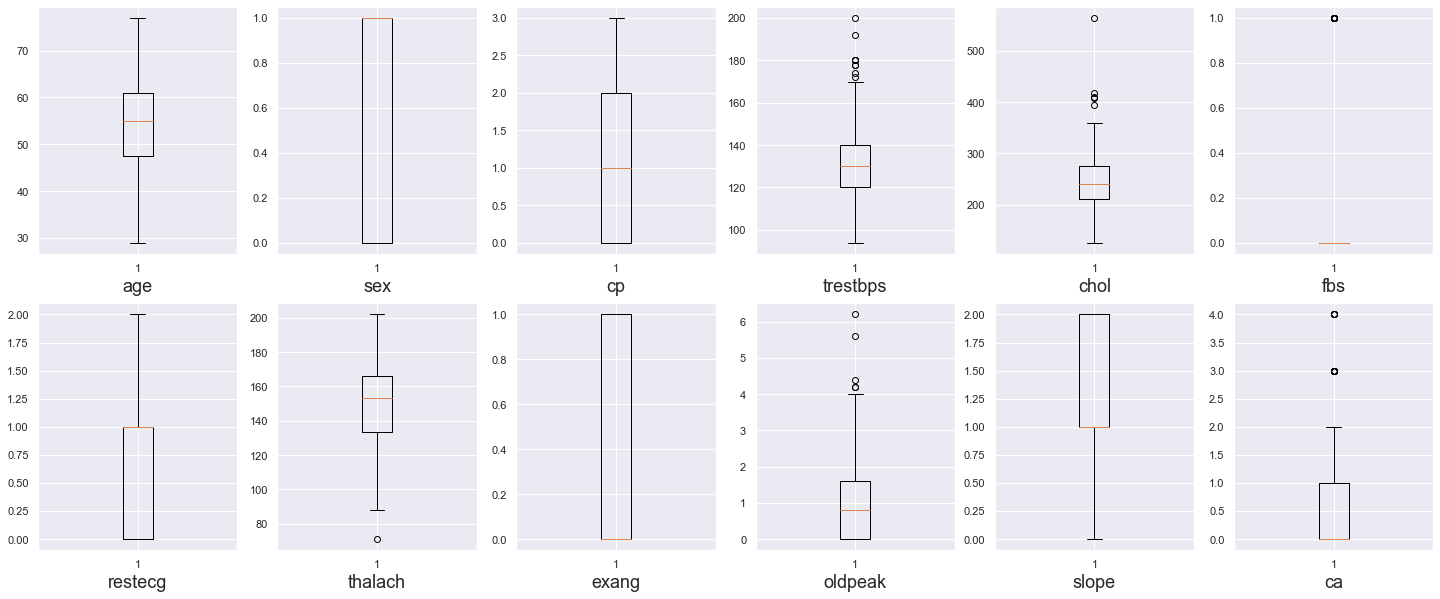

In [168]:
plt.figure(figsize=(25, 10))
col = 1

for i in data.columns:
    if data[i].dtype == "object":
        continue
    elif col<13:
        plt.subplot(2, 6, col)
        plt.boxplot(data[i])
        plt.xlabel(i, y=-0.1, fontsize=18)
    col=col+1

In [169]:
# Removing outliers from the column trestbps

q = data["trestbps"].quantile(0.97)
q1 = data[data["trestbps"]<q]

In [170]:
# Removing outliers from the column chol

q = q1["chol"].quantile(0.98)
q2 = q1[q1["chol"]<q]

In [171]:
# Removing outliers from the column oldpeak

q = q2["oldpeak"].quantile(0.98)
q3 = q2[q2["oldpeak"]<q]



In [172]:
# Removing outliers from the column ca

q = q3["ca"].quantile(0.98)
q4 = q3[q3["ca"]<q]

In [173]:
df = q4.reset_index(drop=True)

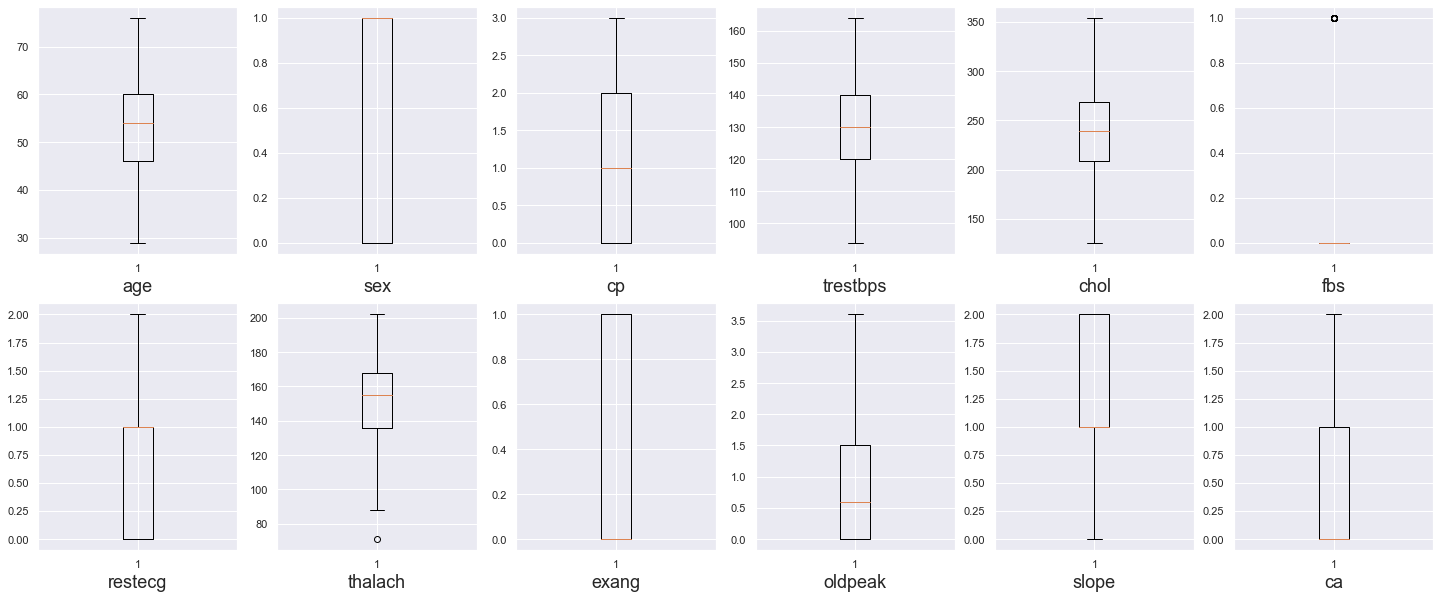

In [174]:
plt.figure(figsize=(25, 10))
col = 1

for i in df.columns:
    if data[i].dtype == "object":
        continue
    elif col<13:
        plt.subplot(2, 6, col)
        plt.boxplot(df[i])
        plt.xlabel(i, y=-0.1, fontsize=18)
    col=col+1

# Spliting the Feature And Target


In [175]:
X = data.drop(columns='target', axis=1)
y = data['target']

In [176]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [177]:
print (y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Spliting the Data Into Training Data And Testing Data

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

In [179]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (272, 13) (31, 13)


# Correlation Heatmap

In [180]:
def correlation(dataset, thershold):
    col_corr = set()
    
    plt.figure(figsize=(10, 8))
    
    corr_matrix = dataset.corr()
    sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.CMRmap_r)
    plt.title("Correlation Heatmap");
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j]>thershold:  
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

Correlated Features: 0 
 set()


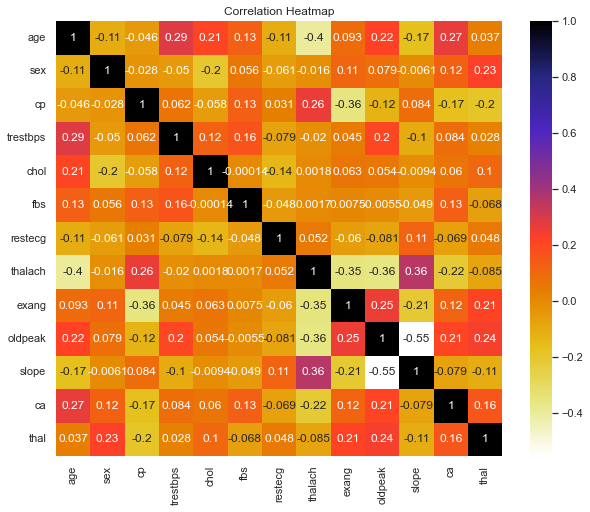

In [181]:
corr_features = correlation(X_train, 0.7)

print ("Correlated Features:", len(set(corr_features)), "\n", corr_features)

# Scaling of Data using StandardScaler

In [182]:
X_scaled = StandardScaler()
X_scaled = X_scaled.fit_transform(X)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=21)

In [184]:
log_reg = LogisticRegression(max_iter=370)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
svc = SVC(C=10000.0, kernel="rbf")

classifier_array = [log_reg, dt, rf, nb, svc]

In [185]:
accy, f1, recall, prsn, tr, tt = [], [], [], [], [], []

for i in classifier_array:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    
    accy.append(round(accuracy_score(y_test, y_pred) * 100, 3))
    f1.append(round(f1_score(y_test, y_pred) * 100, 3))
    recall.append(round(recall_score(y_test, y_pred) * 100, 3))
    prsn.append(round(precision_score(y_test, y_pred) * 100, 3))
    tr.append(round(accuracy_score(y_train, i.predict(X_train))*100, 3))
    tt.append(round(accuracy_score(y_test, y_pred)*100, 3))

model = ["Logistic Regression", "Decision Tree", "Random Forest", "Naïve Bayes", "Support Vector Machine"]

In [186]:
Evaluation = pd.DataFrame({"Model":model, "Accuracy Score":accy, "F1 Score":f1, "Recall Score":recall, "Precision Score":prsn, "Train Score":tr, "Test Score":tt})
Evaluation

,Model,Accuracy Score,F1 Score,Recall Score,Precision Score,Train Score,Test Score
0,Logistic Regression,80.645,78.571,84.615,73.333,85.294,80.645
1,Decision Tree,74.194,69.231,69.231,69.231,100.000,74.194
2,Random Forest,80.645,76.923,76.923,76.923,100.000,80.645
3,Naïve Bayes,87.097,84.615,84.615,84.615,84.559,87.097
4,Support Vector Machine,64.516,62.069,69.231,56.250,100.000,64.516
